In [3]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from xgboost import XGBRegressor
import matplotlib.pyplot as plt


try:
# Carica il tuo file XLSX
    xlsx_file = 'C:/Users/francesco01.lampa/PycharmProjects/Permeability_Eval_AI/dataset/richerDataset.xlsx'  # Sostituisci con il percorso del tuo file

# Leggi i dati dal file XLSX e crea un DataFrame
    df: DataFrame = pd.read_excel(xlsx_file)

# Ora hai un DataFrame con tutti i dati dal tuo file XLSX che puoi utilizzare per l'analisi.
except FileNotFoundError as e:
    print("Il file non è stato trovato.")
# except Exception as e:
    print(f"Si è verificato un errore: {e}")                                                          
    
# Rimuovi il record con k_m2 uguale a 0
df = df[df['k_m2'] != 0]
#Rimuovi colonne Porosity tot e SSA tot
df = df.drop(['Porosity_Tot', 'SSA_Tot'], axis=1)
# Resetta gli indici del DataFrame
df.reset_index(drop=True, inplace=True)


k2_max = df['k_m2'].max()
k2_min = df['k_m2'].min()
print(df)

    Conn.Dens.  Porosity     SSA      Ech  Tortuosity          k_m2
0      310.913     0.137   5.065  -25.849      2.0340  1.473350e-12
1      310.913     0.147   5.253  -31.002      2.6650  2.254724e-12
2      310.913     0.131   4.697  -20.047      2.1090  9.543177e-12
3      350.137     0.115   5.583  -50.613      4.1830  9.664920e-13
4      350.137     0.139   7.447 -136.737      2.5950  9.180783e-13
5      350.137     0.115   5.311  -32.907      4.1010  1.435774e-12
6      368.141     0.134   6.990 -115.218      2.7740  4.010302e-13
7      368.141     0.138   7.132 -110.411      2.7790  3.937021e-12
8      368.141     0.116   5.290  -39.748      3.8680  1.933907e-12
9       10.573     0.020   0.791   -3.948      3.1000  3.021802e-13
10      10.573     0.020   0.806   -2.017      2.9000  3.190436e-13
11     458.436     0.273   7.721 -102.424      1.7170  5.516051e-11
12     458.436     0.250   6.870  -76.478      1.3530  3.822390e-11
13     458.436     0.265   7.560  -95.050      1

In [4]:
# Calcola le statistiche descrittive per tutto il DataFrame
descriptive_stats = df.describe()

# Stampa le statistiche descrittive
print("Descriptive Statistics:\n", descriptive_stats)

Descriptive Statistics:
        Conn.Dens.   Porosity        SSA         Ech  Tortuosity          k_m2
count   47.000000  47.000000  47.000000   47.000000   47.000000  4.700000e+01
mean   270.504617   0.121851   6.172596 -106.591532    3.170772  8.913665e-12
std    159.433831   0.067019   2.449245   74.449813    0.878953  2.483465e-11
min     10.573000   0.020000   0.791000 -362.849000    1.340000  2.456179e-14
25%    116.198000   0.078000   4.747000 -156.334000    2.776500  3.106119e-13
50%    307.044000   0.115000   5.808000 -110.411000    3.313300  5.462786e-13
75%    359.139000   0.137500   7.687000  -44.292500    3.834000  1.447758e-12
max    607.796000   0.297000  10.300000   -2.017000    4.459000  1.319490e-10


In [12]:
# Controlla i valori mancanti
missing_values = df.isnull().sum()
print("\nMissing Values:\n", missing_values)

# Calcola la matrice di correlazione
correlation_matrix = df.corr()
print("\nCorrelation Matrix:\n", correlation_matrix)


Missing Values:
 Conn.Dens.    0
Porosity      0
SSA           0
Ech           0
Tortuosity    0
k_m2          0
dtype: int64

Correlation Matrix:
             Conn.Dens.  Porosity       SSA       Ech  Tortuosity      k_m2
Conn.Dens.    1.000000  0.864499  0.664176 -0.639080   -0.617447  0.587967
Porosity      0.864499  1.000000  0.632855 -0.523979   -0.697743  0.767341
SSA           0.664176  0.632855  1.000000 -0.754408   -0.229806  0.259044
Ech          -0.639080 -0.523979 -0.754408  1.000000    0.300040 -0.455071
Tortuosity   -0.617447 -0.697743 -0.229806  0.300040    1.000000 -0.634436
k_m2          0.587967  0.767341  0.259044 -0.455071   -0.634436  1.000000


<Figure size 1200x1200 with 0 Axes>

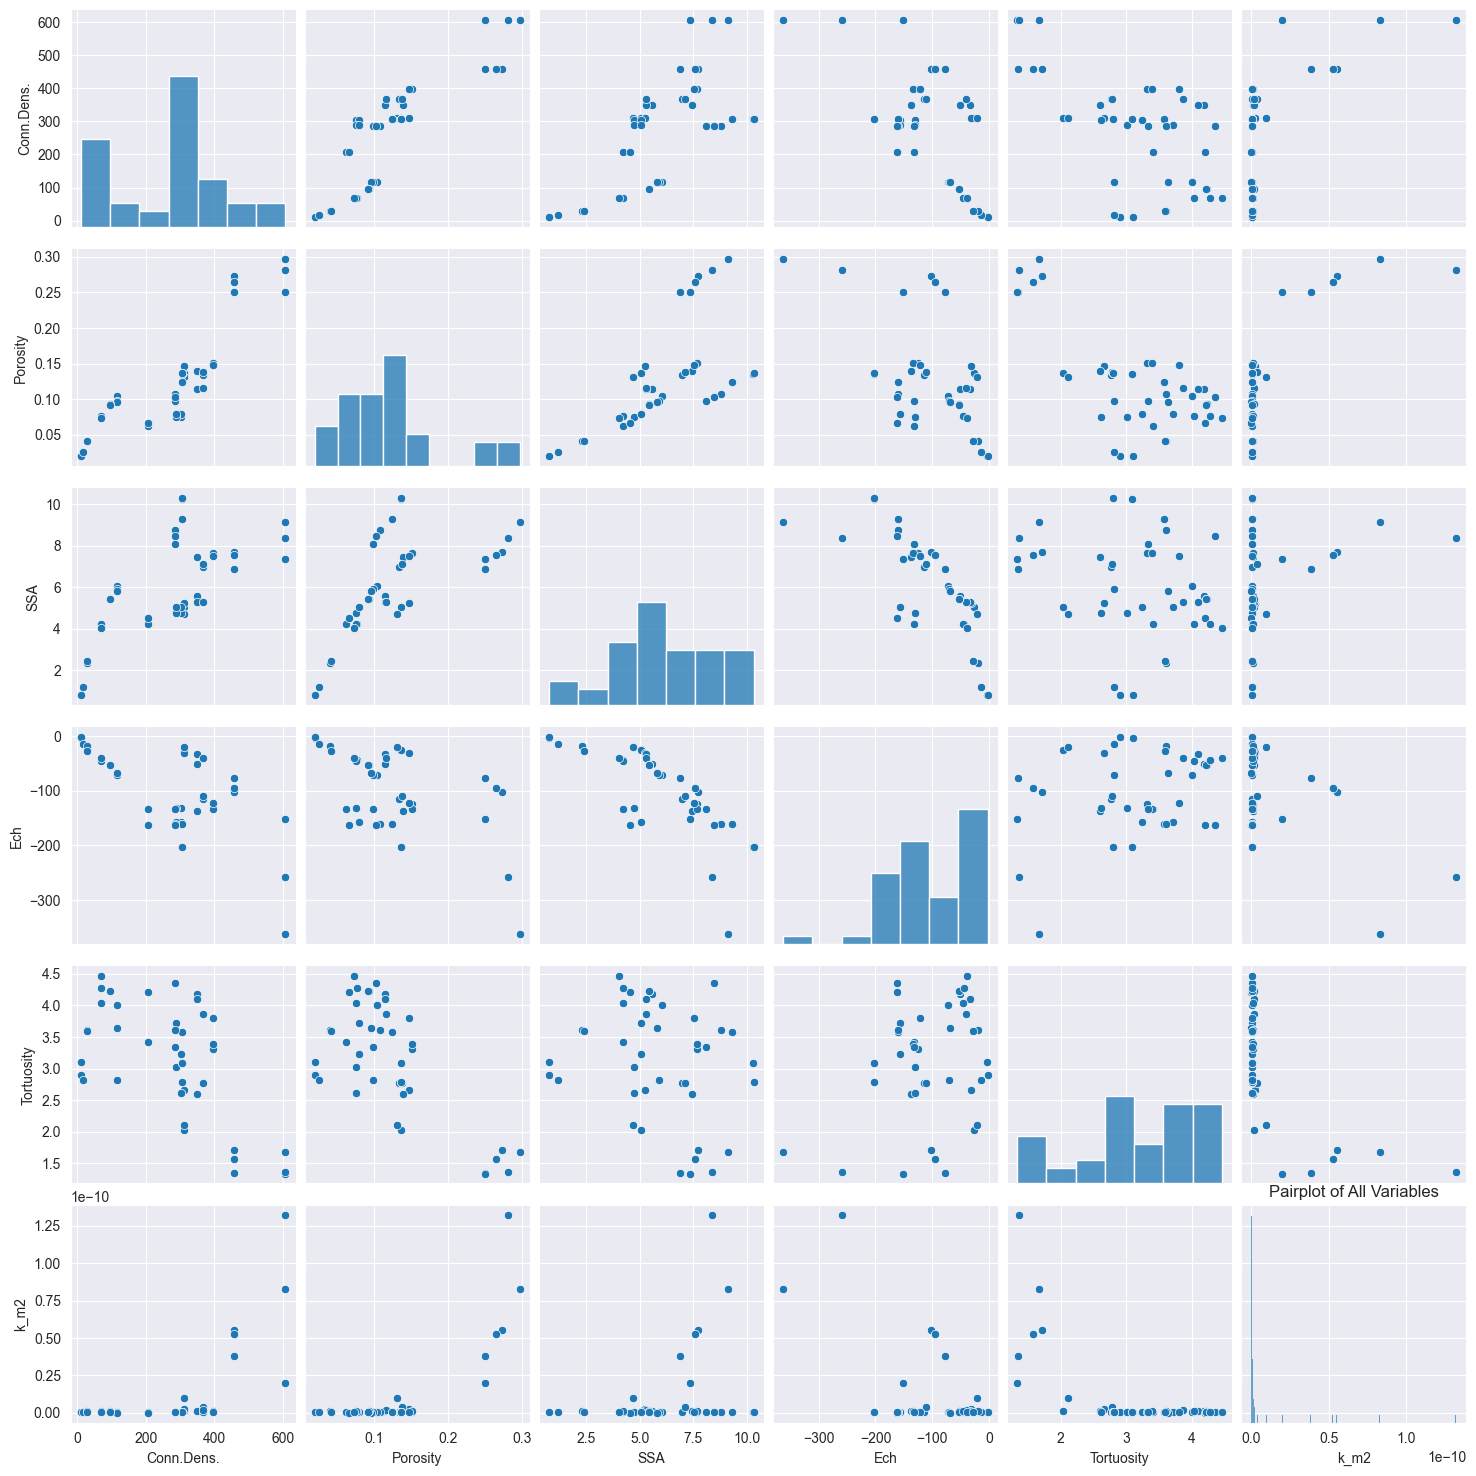

In [7]:
import os

# Pairplot delle variabili
plt.figure(figsize=(12, 12))
sns.pairplot(df)

relative_path_png = 'C:/Users/francesco01.lampa/PycharmProjects/Permeability_Eval_AI/pictures_extract/png/'
relative_path_pdf = 'C:/Users/francesco01.lampa/PycharmProjects/Permeability_Eval_AI/pictures_extract/pdf/'
# Assicurati che la directory esista
os.makedirs(os.path.dirname(relative_path_png), exist_ok=True)
os.makedirs(os.path.dirname(relative_path_pdf), exist_ok=True)


plt.title('Pairplot of All Variables')
plt.savefig(f'{relative_path_png}pairplot_all_variables.png')  # Save the pairplot as an image file
plt.savefig(f'{relative_path_pdf}pairplot_all_variables.pdf', dpi=300)  # Save the pairplot as a PDF file
plt.show()

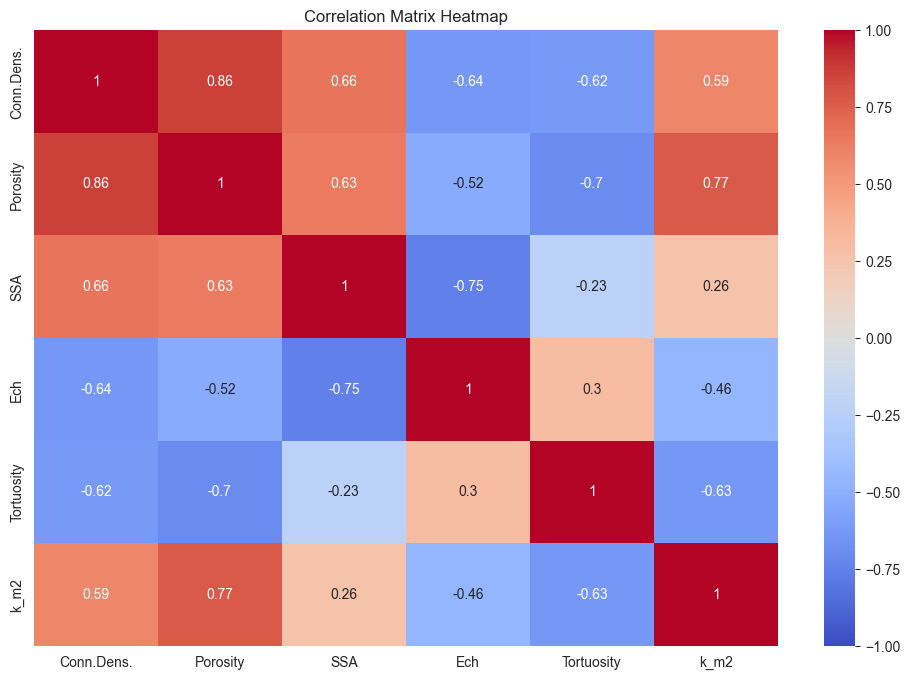

In [5]:
# Heatmap della matrice di correlazione
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [8]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(df)
# Crea un nuovo DataFrame con i dati scalati e riassegna le colonne non scalate
#df_scaled = pd.DataFrame(scaled_data, columns=columns_to_scale)
df_scaled = pd.DataFrame(scaled_data, columns=df.columns)

# Stampa il DataFrame scalato
print("DataFrame scalato:")
print(df_scaled)


DataFrame scalato:
    Conn.Dens.  Porosity       SSA       Ech  Tortuosity      k_m2
0     0.502894  0.422383  0.449469  0.933953    0.222507  0.010982
1     0.502894  0.458484  0.469240  0.919672    0.424816  0.016905
2     0.502894  0.400722  0.410769  0.950032    0.246553  0.072152
3     0.568572  0.342960  0.503944  0.865322    0.911510  0.007140
4     0.568572  0.429603  0.699968  0.626641    0.402373  0.006773
5     0.568572  0.342960  0.475339  0.914392    0.885220  0.010697
6     0.598718  0.411552  0.651909  0.686278    0.459763  0.002854
7     0.598718  0.425993  0.666842  0.699600    0.461366  0.029657
8     0.598718  0.346570  0.473131  0.895433    0.810516  0.014473
9     0.000000  0.000000  0.000000  0.994648    0.564283  0.002104
10    0.000000  0.000000  0.001577  1.000000    0.500160  0.002232
11    0.749909  0.913357  0.728783  0.721735    0.120872  0.417936
12    0.749909  0.830325  0.639289  0.793641    0.004168  0.289555
13    0.749909  0.884477  0.711852  0.74217

Questa fase viene eseguita la PCA analysis

In [ ]:
from sklearn.decomposition import PCA

# Inizializzare la PCA e specificare il numero di componenti principali
pca = PCA(n_components=2)

#Dichiarazione insieme train 'X' e test 'y'
X = df_scaled.drop('k_m2', axis=1)
y = df_scaled['k_m2']
    
# Adattare la PCA ai dati e trasformarli
X_pca = pca.fit_transform(X)

# Creare un DataFrame con le componenti principali
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])

plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=y, cmap='viridis', edgecolor='k', s=50)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA of Dataset')
plt.colorbar(label='k_m2')
plt.grid(True)
plt.show()


Best random_state for train_test_split: 80 with R^2 score: 0.9973165672614642


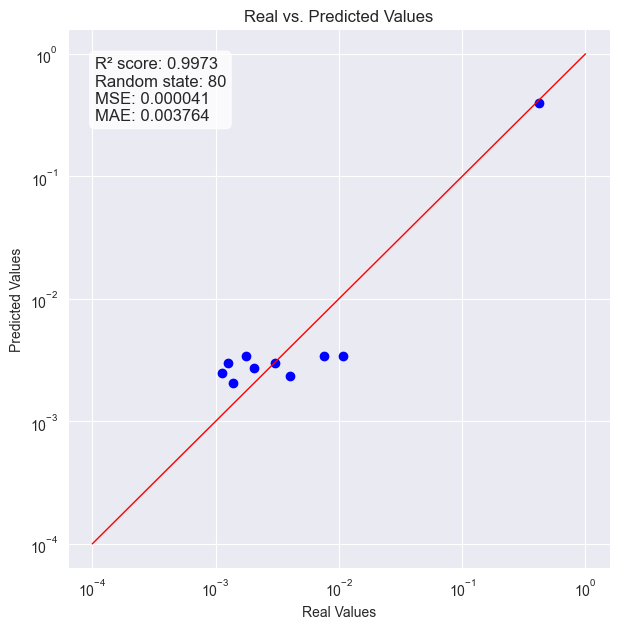

In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error


# Primo allenamento grezzo

best_y_pred = None
best_y_test = None
best_random_state_split = None
best_score_split = -float('inf')
best_mse = None
best_mae = None


# Dichiarazione insieme train 'X' e test 'y'
X = df_scaled.drop('k_m2', axis=1)
y = df_scaled['k_m2']
    
for random_state in range(0, 100):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
    
    model = XGBRegressor()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    score = r2_score(y_test, y_pred)
    
    if score > best_score_split:
        best_score_split = score
        best_random_state_split = random_state
        best_y_test = y_test
        best_y_pred = y_pred
        best_mse = mean_squared_error(y_test, y_pred)
        best_mae = mean_absolute_error(y_test, y_pred)

print(f"Best random_state for train_test_split: {best_random_state_split} with R^2 score: {best_score_split}")



plt.figure(figsize=(7, 7))
plt.scatter(best_y_test, best_y_pred, color='blue')  # Cambia il colore dei punti in blu
plt.plot([10**-4, 10**0], [10**-4, 10**0], 'r-', lw=1)
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.title('Real vs. Predicted Values')
plt.xscale('log', base=10)
plt.yscale('log', base=10)
plt.grid(True)  # Disabilita la griglia


# Adding a text box with the R² score and random_state
textstr = f'R² score: {best_score_split:.4f}\nRandom state: {best_random_state_split}\nMSE: {best_mse:.6f}\nMAE: {best_mae:.6f}'
props = dict(boxstyle='round', facecolor='white', alpha=0.8)
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='top', bbox=props)


# Salva il grafico come immagine PNG
plt.savefig(f'{relative_path_png}preliminaryTraining.png')  # Salva il grafico come immagine PNG
# Salva il grafico come PDF
plt.savefig(f'{relative_path_pdf}preliminaryTraining.pdf', dpi=300)  # Salva il grafico come PDF

plt.show()

Hyperparameter tuning

Fitting 10 folds for each of 1944 candidates, totalling 19440 fits
Best parameters found: {'alpha': 0, 'colsample_bytree': 0.9, 'gamma': 0, 'learning_rate': 0.3, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.7}
R^2 score: 0.9705903349217335
MSE: 0.0004545067169589307
MAE: 0.008500434604685626


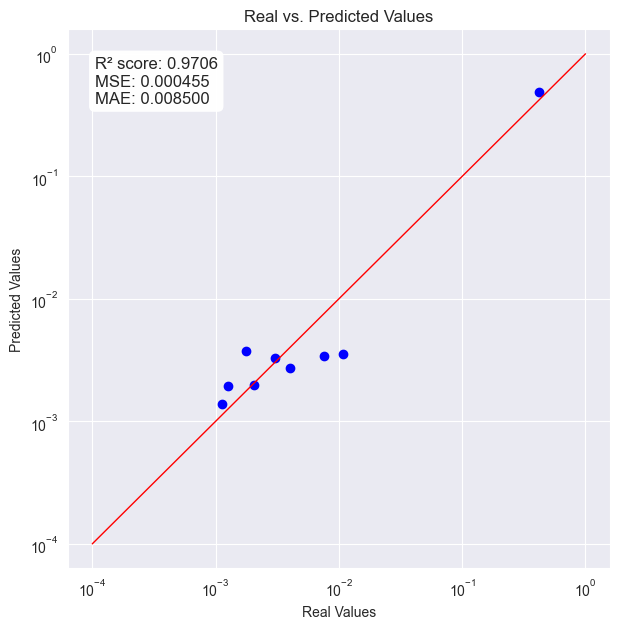

In [19]:
from sklearn.model_selection import GridSearchCV, LeaveOneOut
from tqdm import tqdm
import joblib

# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'learning_rate': [0.01, 0.1, 0.3],  
#     'max_depth': [3, 5, 7],
#     'subsample': [0.7, 0.8, 0.9],
#     'colsample_bytree': [ 0.7, 0.8, 0.9],
#     'min_child_weight': [1, 5],
#     'gamma': [0, 0.1],
#     'lambda': [0.01, 0.1, 1],
#     'alpha': [0, 0.01, 0.1]
# }


param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.3],  
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.5, 0.7, 0.9],
    'min_child_weight': [1, 5],
    'gamma': [0, 0.1],
    'alpha': [0, 0.1]
}


X = df_scaled.drop('k_m2', axis=1)
y = df_scaled['k_m2']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=best_random_state_split)

model = XGBRegressor(random_state=best_random_state_split)


# Integra tqdm con joblib per mostrare la progress bar
tqdm_callback = lambda iterable: tqdm(
    iterable, 
    total=len(param_grid['n_estimators']) * len(param_grid['learning_rate']) * len(param_grid['max_depth']) * len(param_grid['subsample']) * len(param_grid['colsample_bytree']), 
    desc="Hyperparameter tuning"
)

# Usa joblib per patchare il parallel computing di scikit-learn
with joblib.parallel_backend('loky', inner_max_num_threads=1):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)


best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print(f"Best parameters found: {grid_search.best_params_}")
print(f"R^2 score: {r2_score(y_test, y_pred)}")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")


plt.figure(figsize=(7, 7))
plt.scatter(y_test, y_pred, color='blue')  # Cambia il colore dei punti in blu
plt.plot([10**-4, 10**0], [10**-4, 10**0], 'r-', lw=1)
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.title('Real vs. Predicted Values')
plt.xscale('log', base=10)
plt.yscale('log', base=10)
plt.grid(True)  # Disabilita la griglia


# Adding a text box with the R² score and random_state
textstr = f'R² score: {r2_score(y_test, y_pred):.4f}\nMSE: {mean_squared_error(y_test, y_pred):.6f}\nMAE: {mean_absolute_error(y_test, y_pred):.6f}'
props = dict(boxstyle='round', facecolor='white', alpha=0.99)
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='top', bbox=props)

# Salva il grafico come immagine PNG
plt.savefig(f'{relative_path_png}hyperParam_tuning.png')  # Salva il grafico come immagine PNG
# Salva il grafico come PDF
plt.savefig(f'{relative_path_pdf}hyperParam_tuning.pdf', dpi=300)  # Salva il grafico come PDF

plt.show()

In [9]:
# Crea un DataFrame con i valori reali e predetti
results_df = pd.DataFrame({
    'Valori Reali': y_test,
    'Valori Predetti': y_pred
})

# Stampa il DataFrame
print("\nValori Reali vs Valori Predetti:\n")
print(results_df)


Valori Reali vs Valori Predetti:

    Valori Reali  Valori Predetti
20      0.001381         0.001508
41      0.001757         0.003114
34      0.001132         0.002568
42      0.007556         0.003274
26      0.002038         0.002376
44      0.001272         0.001750
21      0.004007         0.002037
27      0.003040         0.002821
39      0.010879         0.003470
11      0.417936         0.399237


Best random_state for train_test_split: 80 with R^2 score: 0.9972315029350974


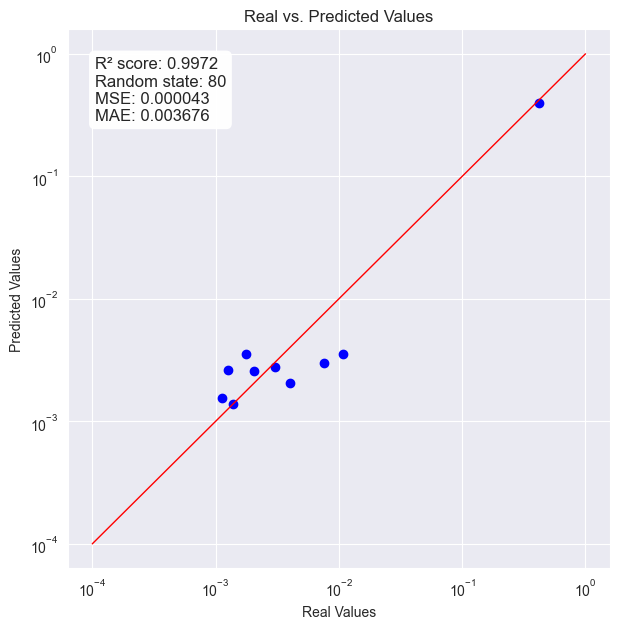

In [58]:
#Con gli iperparametri migliori trovati, riaddestro il modello sul miglior random state per train_test_split

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
import matplotlib.pyplot as plt


best_y_pred = None
best_y_test = None
best_random_state_split = None
best_score_split = -float('inf')
#Dichiarazione insieme train 'X' e test 'y'
X = df_scaled.drop('k_m2', axis=1)
y = df_scaled['k_m2']
    
for random_state in range(0, 100):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
    
    model = XGBRegressor(
        alpha= 0,
        colsample_bytree= 0.8,
        gamma= 0,
        learning_rate= 0.1,
        max_depth= 7,
        reg_lambda = 0.1,
        min_child_weight = 1,
        n_estimators= 100,
        subsample= 0.9
    )
        
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    score = r2_score(y_test, y_pred)
    
    if score > best_score_split:
        best_score_split = score
        best_random_state_split = random_state
        best_y_pred = y_pred
        best_y_test = y_test

print(f"Best random_state for train_test_split: {best_random_state_split} with R^2 score: {best_score_split}")
plt.figure(figsize=(7, 7))
plt.scatter(best_y_test, best_y_pred, color='blue')
plt.plot([10**-4, 10**0], [10**-4, 10**0], 'r-', lw=1)
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.xscale('log', base=10)
plt.yscale('log', base=10)
plt.title('Real vs. Predicted Values')
plt.grid(True)


# Adding a text box with the R² score and random_state
textstr = f'R² score: {r2_score(best_y_test, best_y_pred):.4f}\nRandom state: {best_random_state_split}\nMSE: {mean_squared_error(best_y_test, best_y_pred):.6f}\nMAE: {mean_absolute_error(best_y_test, best_y_pred):.6f}'
props = dict(boxstyle='round', facecolor='white', alpha=0.99)
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='top', bbox=props)

# Salva il grafico come immagine PNG
plt.savefig(f'{relative_path_png}final_train.png')  # Salva il grafico come immagine PNG
# Salva il grafico come PDF
plt.savefig(f'{relative_path_pdf}final_train.pdf', dpi=300)  # Salva il grafico come PDF

plt.show()

In [26]:
# Crea un DataFrame con i valori reali e predetti
results_df = pd.DataFrame({
    'Valori Reali': best_y_test,
    'Valori Predetti': best_y_pred
})

# Stampa il DataFrame
print("\nValori Reali vs Valori Predetti:\n")
print(results_df)


Valori Reali vs Valori Predetti:

    Valori Reali  Valori Predetti
20      0.001381         0.001582
41      0.001757         0.003398
34      0.001132         0.002047
42      0.007556         0.002661
26      0.002038         0.002696
44      0.001272         0.002674
21      0.004007         0.001219
27      0.003040         0.002696
39      0.010879         0.003380
11      0.417936         0.399467


Valutazione del modello
- QQ plot
- Residual plot
- Feature importance
- Bias-Variance Tradeoff 

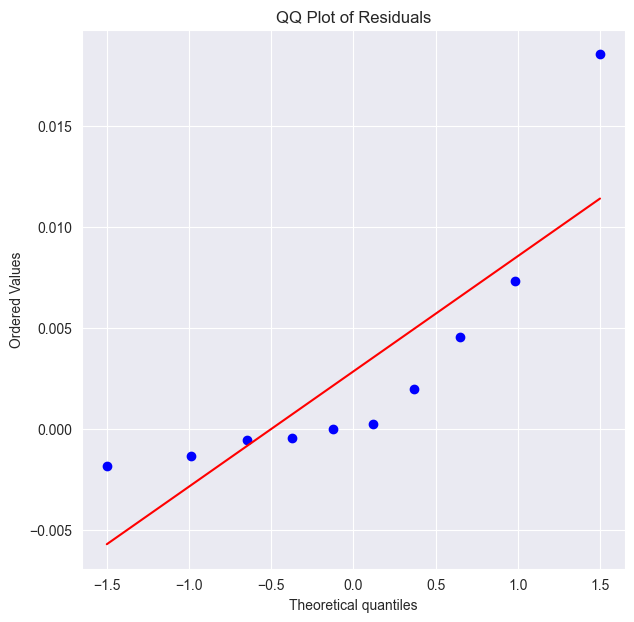

In [38]:
import scipy.stats as stats

# QQ plot of the residuals
residuals = best_y_test - best_y_pred
plt.figure(figsize=(7, 7))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('QQ Plot of Residuals')
plt.grid(True)

# Salva il grafico come immagine PNG
plt.savefig(f'{relative_path_png}qq.png')  # Salva il grafico come immagine PNG
# Salva il grafico come PDF
plt.savefig(f'{relative_path_pdf}qq.pdf', dpi=300)  # Salva il grafico come PDF

plt.show()

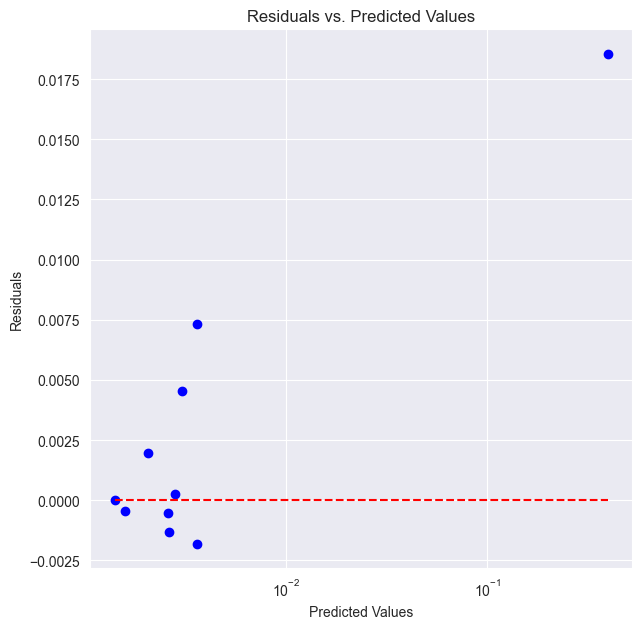

In [59]:
# Residual plot
plt.figure(figsize=(7, 7))
plt.scatter(best_y_pred, residuals, color = 'blue')
plt.hlines(0, min(best_y_pred), max(best_y_pred), colors='r', linestyles='dashed')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.xscale('log', base=10)
plt.title('Residuals vs. Predicted Values')
plt.grid(True)


# Salva il grafico come immagine PNG
plt.savefig(f'{relative_path_png}residuals.png')  # Salva il grafico come immagine PNG
# Salva il grafico come PDF
plt.savefig(f'{relative_path_pdf}residuals.pdf', dpi=300)  # Salva il grafico come PDF
plt.show()

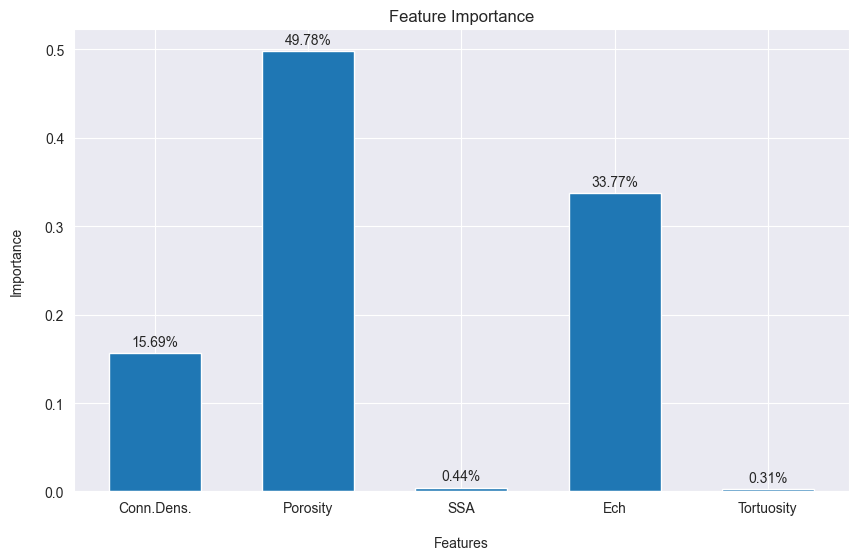

In [65]:
#TODO: PARLARE CON DANICA
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

# Example code to plot feature importance with values annotated on each bar
plt.figure(figsize=(10, 6))

# Adjust the width of the bars
bar_width = 0.6  # Reduce this value to make the bars narrower

# Plot the bars with the specified width
bars = plt.bar(range(len(model.feature_importances_)), model.feature_importances_, width=bar_width)
plt.xticks(range(len(model.feature_importances_)), X.columns, rotation=0)
plt.title('Feature Importance')
plt.xlabel('Features', labelpad=15)
plt.ylabel('Importance',labelpad=15)
plt.grid(True)

# Annotate the bars with the importance values as percentages
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.2%}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')


# Salva il grafico come immagine PNG
plt.savefig(f'{relative_path_png}feature_importance.png')  # Salva il grafico come immagine PNG
# Salva il grafico come PDF
plt.savefig(f'{relative_path_pdf}feature_importance.pdf', dpi=300)  # Salva il grafico come PDF
plt.show()

Questo è il corretto modello di Bias-Variance Tradeoff

MSE Train Mean: 3.5984746085482844e-07
MSE Test Mean: 0.020725595518854507


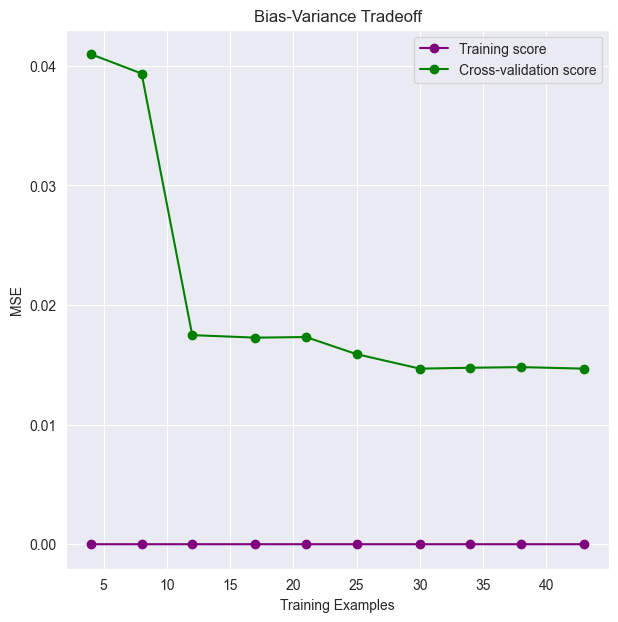

In [56]:
from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_squared_error

# Bias-Variance plot with MSE
train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, cv=15, scoring='neg_mean_squared_error', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = -np.mean(train_scores, axis=1)  # Invert sign for positive MSE
test_scores_mean = -np.mean(test_scores, axis=1)

train_mean = np.mean(train_scores_mean)
test_mean = np.mean(test_scores_mean)

#Stampa
print(f"MSE Train Mean: {train_mean}")
print(f"MSE Test Mean: {test_mean}")

plt.figure(figsize=(7, 7))
plt.plot(train_sizes, train_scores_mean, 'o-', color='purple', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
plt.xlabel('Training Examples')
plt.ylabel('MSE')
# plt.yscale('log', base=10)
plt.title('Bias-Variance Tradeoff')
plt.legend(loc='best')
plt.grid(True)
# Salva il grafico come immagine PNG
plt.savefig(f'{relative_path_png}Bias-Variance.png')  # Salva il grafico come immagine PNG
# Salva il grafico come PDF
plt.savefig(f'{relative_path_pdf}Bias-Variance.pdf', dpi=300)  # Salva il grafico come PDF

plt.show()


Da qui in poi procederemo con l'analisi dei dati aggiuntivi o altre analisi su tutto il dataset

In [ ]:
df_scaled_2 = df_scaled.copy()
df_scaled_2
print(df_scaled_2)

In [ ]:
print(X_train)
print(y_train)

In [ ]:
#voglio rimuovre dal dataset df_scaled_2 i dati con "k_m2" > 0.25
df_scaled_2 = df_scaled_2[df_scaled_2['k_m2'] <= 0.25]
df_scaled_2

In [ ]:
#Con gli iperparametri migliori trovati, riaddestro il modello sul miglior random state per train_test_split

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
import matplotlib.pyplot as plt


best_y_pred = None
best_y_test = None
best_random_state_split = None
best_score_split = -float('inf')

fx_xTrain=None
fx_xTest=None
fx_yTrain=None

df_scaled_2 = df_scaled[df_scaled['k_m2'] <= 0.25]

#Dichiarazione insieme train 'X' e test 'y'
X = df_scaled.drop('k_m2', axis=1)
y = df_scaled['k_m2']
    
for random_state in range(0, 100):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
    
    model = XGBRegressor(
        alpha= 0,
        colsample_bytree= 0.7,
        gamma= 0,
        learning_rate= 0.3,
        max_depth= 7,
        reg_lambda = 0.1,
        min_child_weight = 1,
        n_estimators= 100,
        subsample= 0.9
    )
    
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    score = r2_score(y_test, y_pred)
    
    if score > best_score_split:
        best_score_split = score
        best_random_state_split = random_state
        best_y_pred = y_pred
        best_y_test = y_test
        fx_xTrain = X_train
        fx_xTest = X_test
        fx_yTrain = y_train

print(f"Best random_state for train_test_split: {best_random_state_split} with R^2 score: {best_score_split}")
plt.figure(figsize=(7, 7))
plt.scatter(best_y_test, best_y_pred)
plt.plot([10**-4, 10**0], [10**-4, 10**0], 'r-', lw=1)
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.title('Real vs. Predicted Values')
plt.xscale('log', base=10)
plt.yscale('log', base=10)
plt.grid(True)
plt.show()

In [ ]:
y_pred = model.predict(X)
score = r2_score(y, y_pred)

plt.figure(figsize=(7, 7))
plt.scatter(y, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.title('Real vs. Predicted Values')
plt.grid(True)
plt.show()

In [ ]:
print(score)

In [ ]:
#Visualizzo in Log10

plt.figure(figsize=(7, 7))
plt.scatter(y, y_pred, color='red', alpha=0.8, edgecolors='black') 
plt.scatter(best_y_test, best_y_pred, color='yellow', alpha=0.8, edgecolors='black') 
plt.plot([10**-4, 10**0], [10**-4, 10**0], 'k--', lw=1)
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.title('Real vs. Predicted Values')
plt.xscale('log', base=10)
plt.yscale('log', base=10)
plt.grid(True)
plt.show()